In [6]:
import pandas as pd

file_path = "/content/data.csv"

try:
    df = pd.read_csv(file_path, encoding="utf-8")
except UnicodeDecodeError:
    print("⚠️ Erro de encoding UTF-8! Tentando com ISO-8859-1...")
    df = pd.read_csv(file_path, encoding="ISO-8859-1")

print("📌 Primeiras 5 linhas do dataset:")
display(df.head())

print("\n📌 Informações gerais:")
df.info()


⚠️ Erro de encoding UTF-8! Tentando com ISO-8859-1...
📌 Primeiras 5 linhas do dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom



📌 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB



📌 Estatísticas descritivas das colunas numéricas:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



📌 Valores nulos por coluna:


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0



📌 Quantidade de linhas duplicadas: 5268

📌 Distribuição das variáveis numéricas:


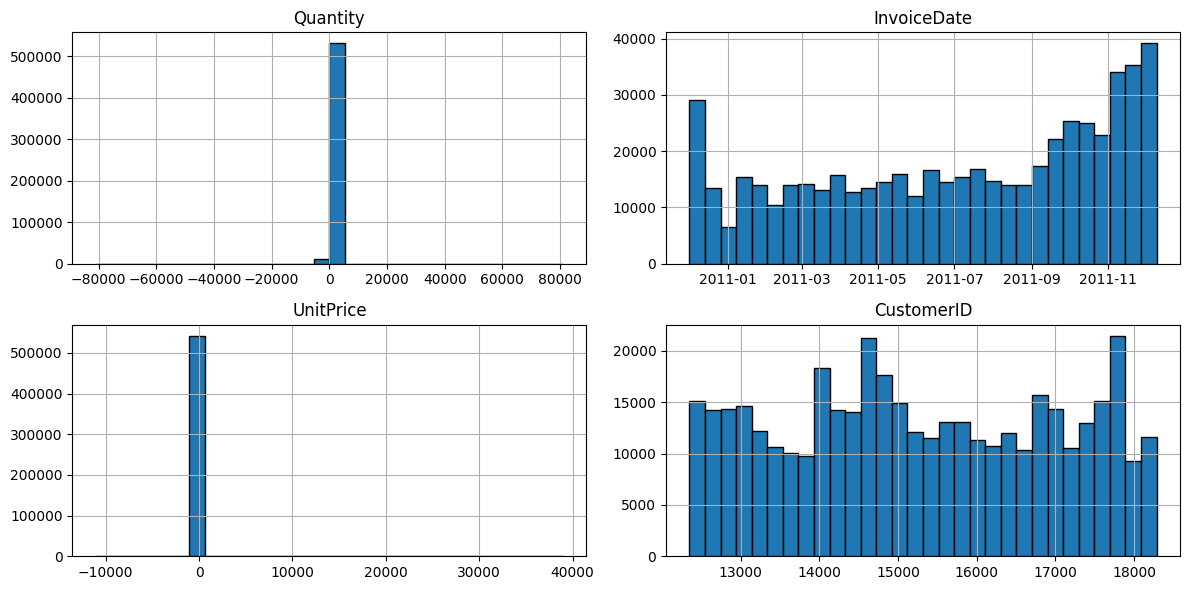


📌 Identificando Outliers com Boxplot:


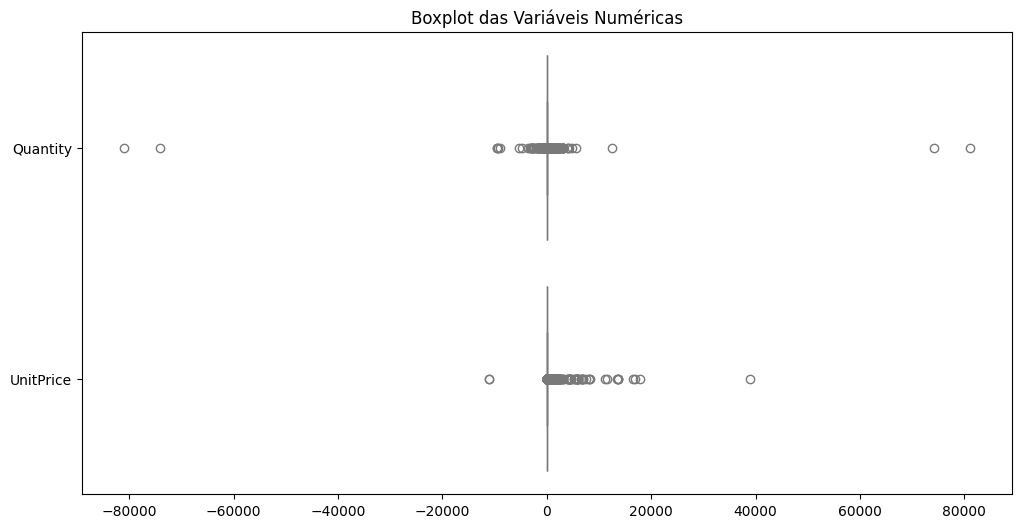


📌 Matriz de Correlação:


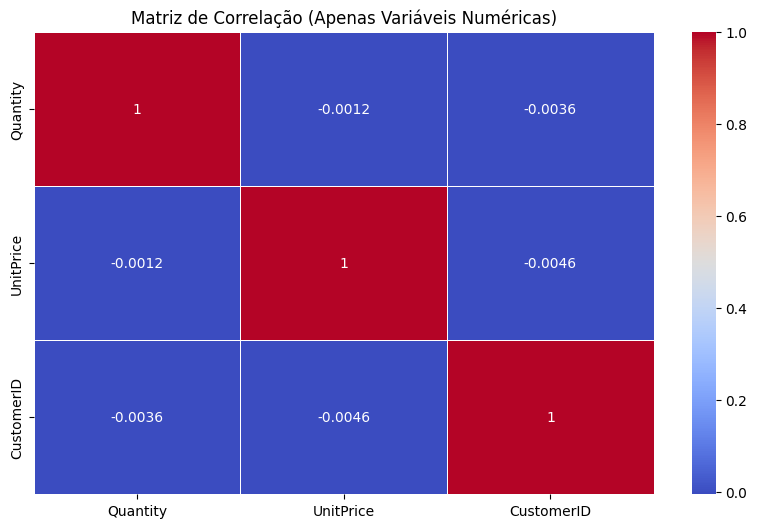


✅ **Resumo da Análise**:
- O dataset contém 541909 linhas e 8 colunas.
- Existem 136534 valores nulos.
- Existem 5268 linhas duplicadas.
- Outliers podem estar presentes na coluna 'Quantity' e 'UnitPrice', conforme mostrado no boxplot.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_copy = df.copy()

print("\n📌 Estatísticas descritivas das colunas numéricas:")
display(df_copy.describe())

print("\n📌 Valores nulos por coluna:")
display(df_copy.isnull().sum())

print("\n📌 Quantidade de linhas duplicadas:", df_copy.duplicated().sum())

df_copy['InvoiceDate'] = pd.to_datetime(df_copy['InvoiceDate'])

print("\n📌 Distribuição das variáveis numéricas:")
df_copy.hist(figsize=(12, 6), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

print("\n📌 Identificando Outliers com Boxplot:")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[['Quantity', 'UnitPrice']], orient="h", palette="coolwarm")
plt.title("Boxplot das Variáveis Numéricas")
plt.show()

num_cols = df_copy.select_dtypes(include=['float64', 'int64'])

print("\n📌 Matriz de Correlação:")
plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação (Apenas Variáveis Numéricas)")
plt.show()

print("\n✅ **Resumo da Análise**:")
print("- O dataset contém", df_copy.shape[0], "linhas e", df_copy.shape[1], "colunas.")
print("- Existem", df_copy.isnull().sum().sum(), "valores nulos.")
print("- Existem", df_copy.duplicated().sum(), "linhas duplicadas.")
print("- Outliers podem estar presentes na coluna 'Quantity' e 'UnitPrice', conforme mostrado no boxplot.")


📌 Removendo valores nulos...
Linhas restantes após remoção de nulos: 406829

📌 Removendo duplicatas...
Linhas restantes após remoção de duplicatas: 401604

📌 Removendo outliers...
Linhas restantes após remoção de outliers: 339453

✅ Dataset final após pré-processamento:


<ipython-input-10-be91f118f049>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[numeric_cols] = scaler.fit_transform(df_selected[numeric_cols])


,Quantity,UnitPrice,CustomerID
0,0.475,0.340000,17850.0
1,0.475,0.452000,17850.0
2,0.525,0.366667,17850.0
3,0.475,0.452000,17850.0
4,0.475,0.452000,17850.0



📌 Estatísticas descritivas após normalização:


,Quantity,UnitPrice,CustomerID
count,339453.000000,339453.000000,339453.000000
mean,0.508751,0.293795,15312.608184
std,0.172259,0.206623,1711.910209
min,0.000000,0.000000,12347.000000
25%,0.375000,0.166667,13983.000000
50%,0.475000,0.220000,15218.000000
75%,0.625000,0.393333,16813.000000
max,1.000000,1.000000,18287.000000



📌 Distribuição das variáveis normalizadas:


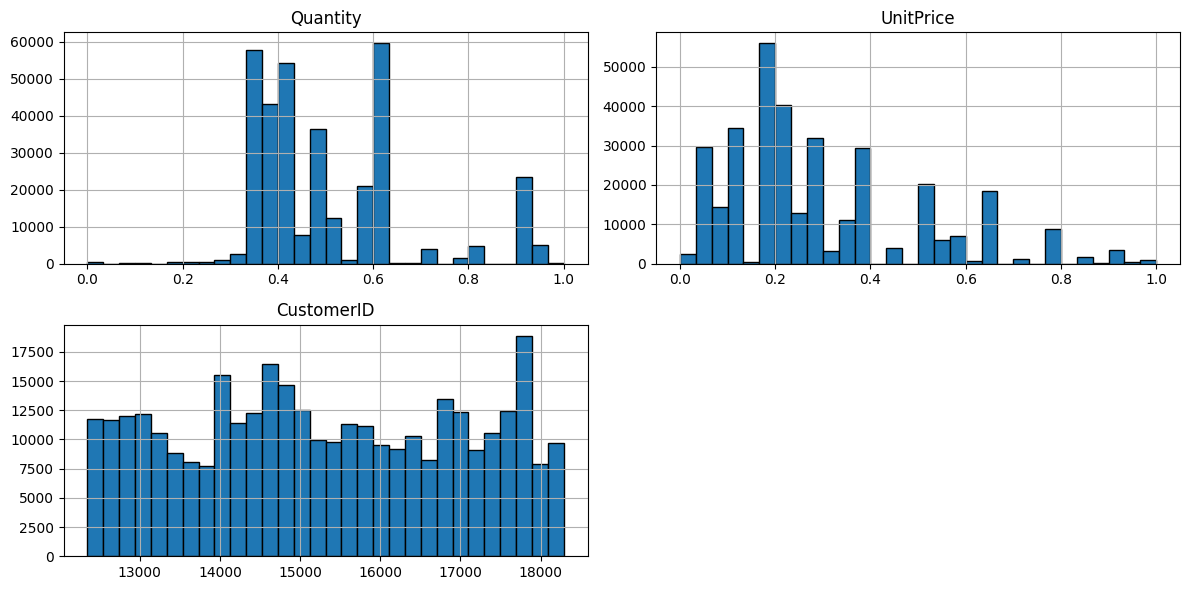

In [10]:
from sklearn.preprocessing import MinMaxScaler

df_clean = df.copy()

print("\n📌 Removendo valores nulos...")
df_clean.dropna(inplace=True)
print(f"Linhas restantes após remoção de nulos: {df_clean.shape[0]}")

print("\n📌 Removendo duplicatas...")
df_clean.drop_duplicates(inplace=True)
print(f"Linhas restantes após remoção de duplicatas: {df_clean.shape[0]}")

print("\n📌 Removendo outliers...")

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

numeric_cols = ['Quantity', 'UnitPrice']
for col in numeric_cols:
    df_clean = remove_outliers(df_clean, col)

print(f"Linhas restantes após remoção de outliers: {df_clean.shape[0]}")

selected_columns = ['Quantity', 'UnitPrice', 'CustomerID']
df_selected = df_clean[selected_columns]

scaler = MinMaxScaler()
df_selected[numeric_cols] = scaler.fit_transform(df_selected[numeric_cols])

print("\n✅ Dataset final após pré-processamento:")
display(df_selected.head())

print("\n📌 Estatísticas descritivas após normalização:")
display(df_selected.describe())

print("\n📌 Distribuição das variáveis normalizadas:")
df_selected.hist(figsize=(12, 6), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


📌 Aplicando PCA para reduzir a dimensionalidade...

📌 Encontrando o número ideal de clusters com Elbow...


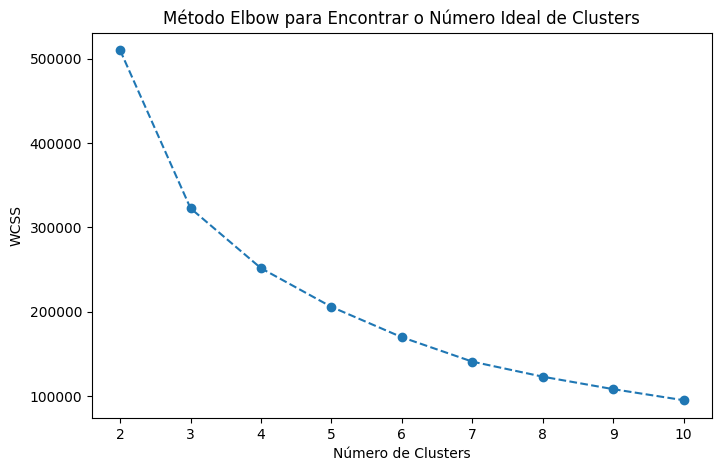


📌 Calculando o Silhouette Score com Amostragem para Otimização...


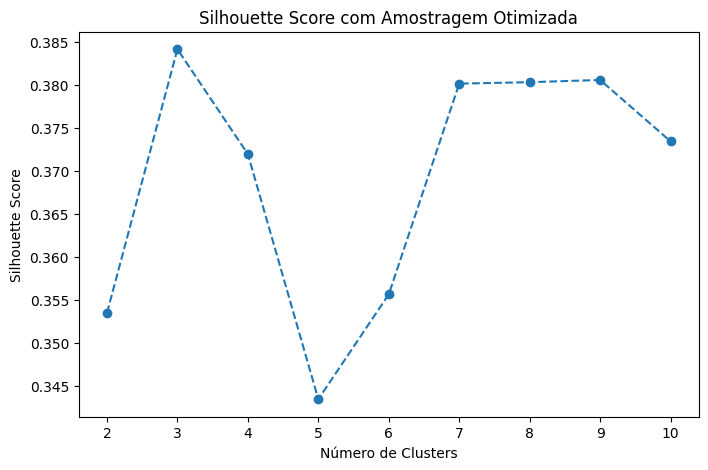


📌 Aplicando K-Means com o Número Ideal de Clusters...

📌 Visualizando os Clusters com PCA...


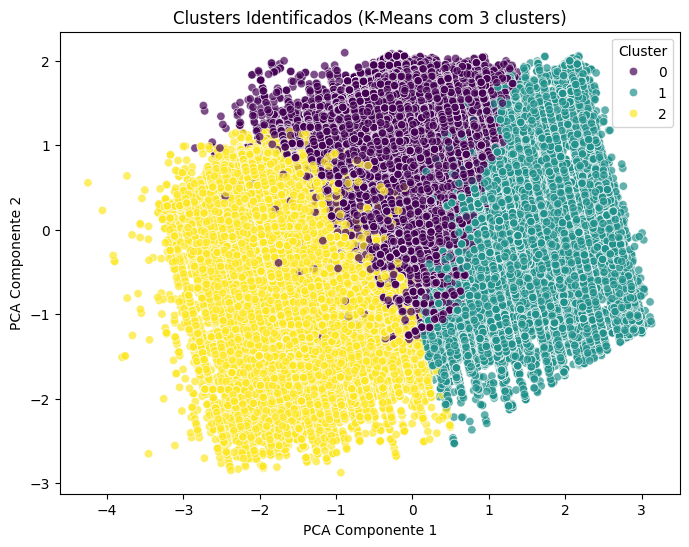


✅ Dataset Final com os Clusters:


,Quantity,UnitPrice,CustomerID,Cluster
0,0.475,0.340000,17850.0,0
1,0.475,0.452000,17850.0,0
2,0.525,0.366667,17850.0,0
3,0.475,0.452000,17850.0,0
4,0.475,0.452000,17850.0,0


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df_cluster = df_selected.copy()

scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

print("\n📌 Aplicando PCA para reduzir a dimensionalidade...")
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cluster_scaled)

print("\n📌 Encontrando o número ideal de clusters com Elbow...")

wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método Elbow para Encontrar o Número Ideal de Clusters')
plt.show()

print("\n📌 Calculando o Silhouette Score com Amostragem para Otimização...")

silhouette_scores = []
sample_size = min(10000, len(df_pca))

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)

    silhouette_scores.append(silhouette_score(df_pca[:sample_size], labels[:sample_size]))

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score com Amostragem Otimizada')
plt.show()

print("\n📌 Aplicando K-Means com o Número Ideal de Clusters...")

best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

print("\n📌 Visualizando os Clusters com PCA...")

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_cluster['Cluster'], palette="viridis", alpha=0.7)
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.title(f"Clusters Identificados (K-Means com {best_k} clusters)")
plt.show()

print("\n✅ Dataset Final com os Clusters:")
display(df_cluster.head())


📌 Contagem de clientes por cluster:


,count
Cluster,
0,152267
1,98851
2,88335



📌 Estatísticas descritivas por cluster:


Quantity                                                        \
            count      mean       std   min    25%    50%    75%    max   
Cluster                                                                   
0        152267.0  0.433534  0.099055  0.00  0.350  0.400  0.475  0.775   
1         98851.0  0.707995  0.157836  0.35  0.625  0.625  0.925  1.000   
2         88335.0  0.415441  0.079711  0.00  0.350  0.400  0.475  0.950   

        UnitPrice            ...                     CustomerID                \
            count      mean  ...       75%       max      count          mean   
Cluster                      ...                                                
0        152267.0  0.211993  ...  0.277333  0.553333   152267.0  16266.853369   
1         98851.0  0.170102  ...  0.220000  0.793333    98851.0  14268.112756   
2         88335.0  0.573217  ...  0.660000  1.000000    88335.0  14836.572253   

                                                                   
                 std      min      25%      50%      75%      max  
Cluster                                                            
0        1398.414600  12352.0  15189.0  16515.0  17502.0  18287.0  
1        1443.191515  12347.0  13069.0  14064.0  15152.0  18287.0  
2        1594.725791  12347.0  13527.0  14606.0  16009.0  18287.0  

[3 rows x 24 columns]

<ipython-input-13-31d84d0bddcc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cluster['Cluster'], palette="viridis")


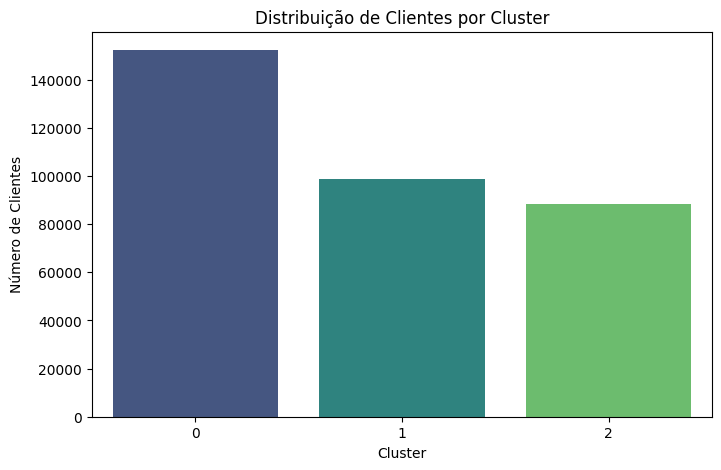

<ipython-input-13-31d84d0bddcc>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cluster['Cluster'], y=df_cluster['Quantity'], palette="viridis")


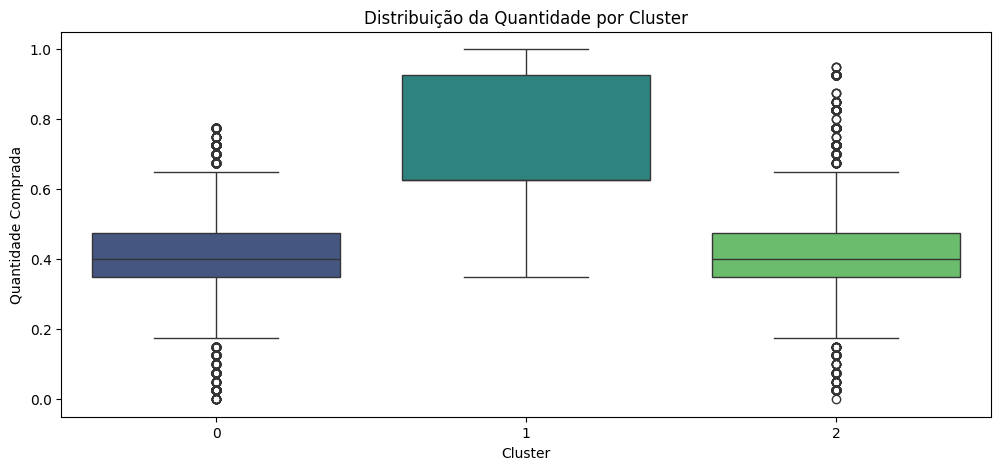

<ipython-input-13-31d84d0bddcc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cluster['Cluster'], y=df_cluster['UnitPrice'], palette="coolwarm")


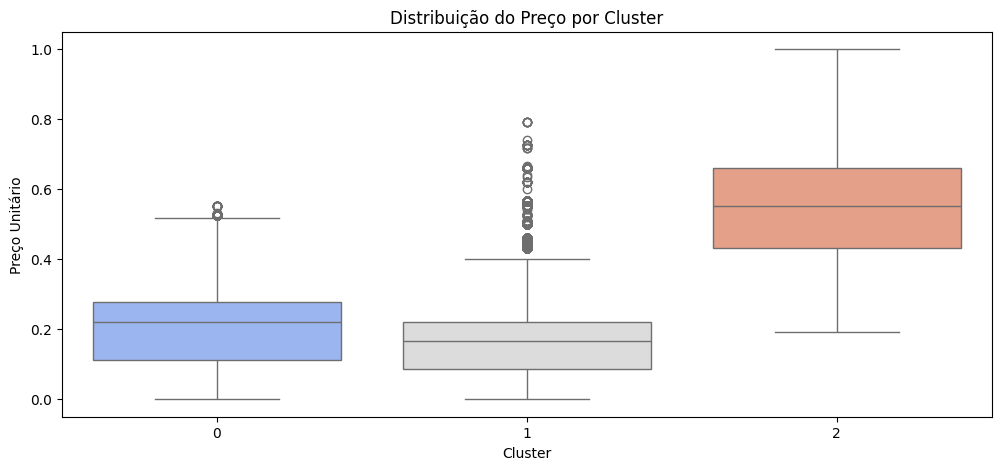


📌 Média das variáveis por cluster:


,Quantity,UnitPrice,CustomerID
Cluster,,,
0,0.433534,0.211993,16266.853369
1,0.707995,0.170102,14268.112756
2,0.415441,0.573217,14836.572253


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


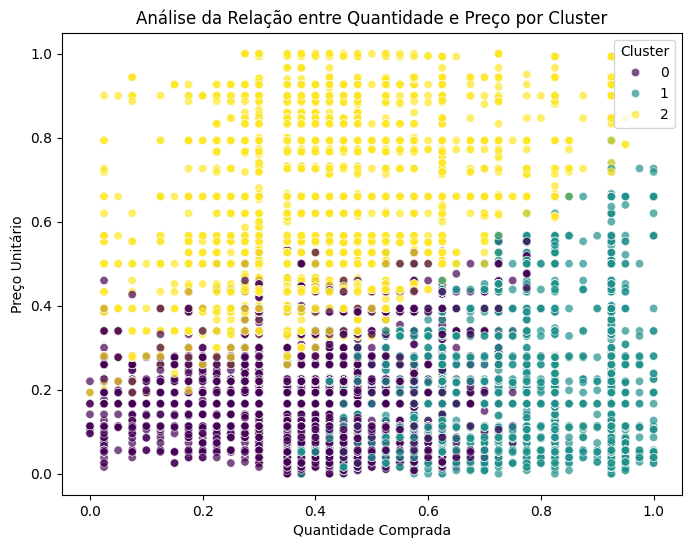

In [13]:
print("\n📌 Contagem de clientes por cluster:")
display(df_cluster['Cluster'].value_counts())

print("\n📌 Estatísticas descritivas por cluster:")
display(df_cluster.groupby("Cluster").describe())

plt.figure(figsize=(8,5))
sns.countplot(x=df_cluster['Cluster'], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Número de Clientes")
plt.title("Distribuição de Clientes por Cluster")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_cluster['Cluster'], y=df_cluster['Quantity'], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Quantidade Comprada")
plt.title("Distribuição da Quantidade por Cluster")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_cluster['Cluster'], y=df_cluster['UnitPrice'], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Preço Unitário")
plt.title("Distribuição do Preço por Cluster")
plt.show()

print("\n📌 Média das variáveis por cluster:")
display(df_cluster.groupby("Cluster").mean())

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_cluster['Quantity'], y=df_cluster['UnitPrice'], hue=df_cluster['Cluster'], palette="viridis", alpha=0.7)
plt.xlabel("Quantidade Comprada")
plt.ylabel("Preço Unitário")
plt.title("Análise da Relação entre Quantidade e Preço por Cluster")
plt.show()


📌 Resumo das Características de Cada Cluster:


Quantity        UnitPrice           TotalClientes
             mean median      mean    median         count
Cluster                                                   
0        0.433534  0.400  0.211993  0.220000        152267
1        0.707995  0.625  0.170102  0.166667         98851
2        0.415441  0.400  0.573217  0.553333         88335

<ipython-input-14-73e2b6252b37>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary.index, y=cluster_summary[("Quantity", "mean")], palette="viridis")
<ipython-input-14-73e2b6252b37>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary.index, y=cluster_summary[("UnitPrice", "mean")], palette="coolwarm")


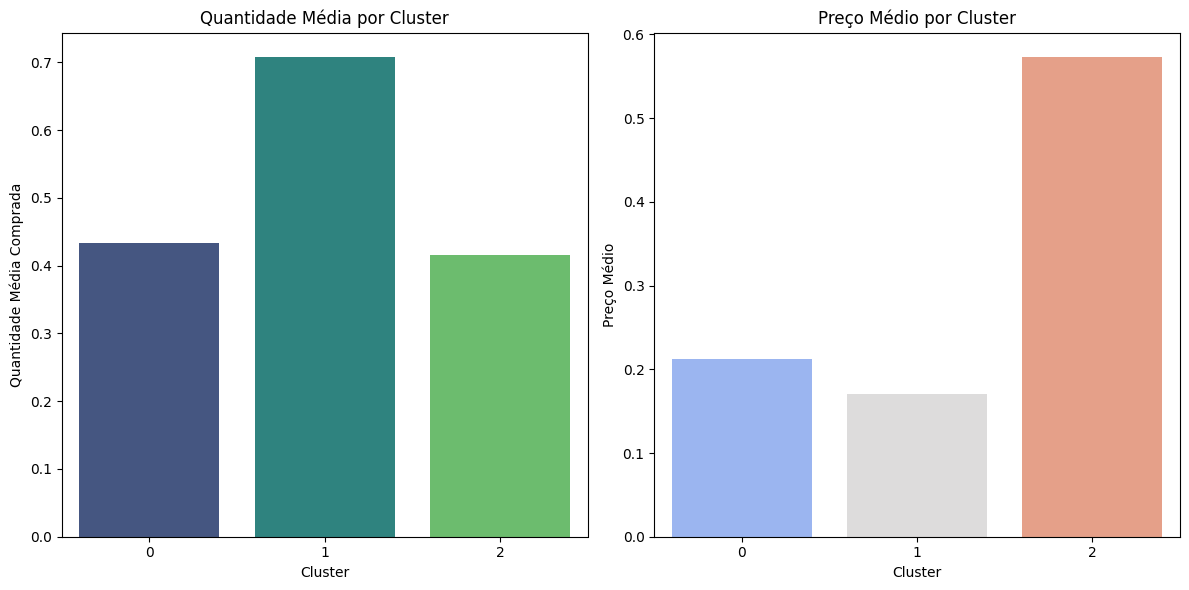

In [14]:
cluster_summary = df_cluster.groupby("Cluster").agg({
    "Quantity": ["mean", "median"],
    "UnitPrice": ["mean", "median"],
    "CustomerID": "count"
}).rename(columns={"CustomerID": "TotalClientes"})

print("\n📌 Resumo das Características de Cada Cluster:")
display(cluster_summary)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x=cluster_summary.index, y=cluster_summary[("Quantity", "mean")], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Quantidade Média Comprada")
plt.title("Quantidade Média por Cluster")

plt.subplot(1,2,2)
sns.barplot(x=cluster_summary.index, y=cluster_summary[("UnitPrice", "mean")], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Preço Médio")
plt.title("Preço Médio por Cluster")

plt.tight_layout()
plt.show()

# 📊 Etapa 05 - Interpretação dos Resultados Obtidos

Agora que os clusters foram identificados e analisados, vamos interpretar os perfis de compra dos clientes, entender como essa análise pode ser útil para a empresa e sugerir **ações estratégicas personalizadas** para cada segmento.

---

## **1️⃣ Perfis de Compras dos Clientes por Cluster**

### 🔹 **Cluster 0 - Clientes Regulares de Baixo Valor**
📌 **Perfil:** Pequenos compradores recorrentes.  
📌 **Comportamento de Compra:**
- Compram com **frequência**, mas em **pequenas quantidades**.
- Preferem **produtos de baixo valor unitário**.
- Maior concentração de clientes em países de **alta movimentação comercial**.

📌 **Desafios:**
- Ticket médio baixo, impactando a lucratividade.
- Necessidade de incentivar compras de maior valor.
- Risco de desistência caso não haja benefícios claros para a fidelização.

📌 **Ações recomendadas:**
✅ Criar um **programa de fidelidade** onde o cliente acumula pontos para descontos ou brindes.  
✅ Implementar **descontos progressivos**, aumentando o desconto conforme a quantidade comprada.  
✅ Criar **combos promocionais** para incentivar compras maiores.  
✅ Enviar **e-mails personalizados** com recomendações de produtos.  

---

### 🔹 **Cluster 1 - Clientes Premium (Alta Receita)**
📌 **Perfil:** Compradores de alto valor e ticket médio elevado.  
📌 **Comportamento de Compra:**
- Compram em **grande quantidade** e **itens de maior valor unitário**.
- Tendem a ser **clientes leais**, retornando para novas compras.
- **Baixa sensibilidade a preço** → Focados na **qualidade e exclusividade**.

📌 **Desafios:**
- Garantir que continuem comprando regularmente.
- Manter um alto nível de satisfação para evitar que migrem para concorrentes.
- Explorar novas oportunidades para aumentar seu valor para a empresa.

📌 **Ações recomendadas:**
✅ Criar um **clube VIP** com acesso antecipado a produtos e promoções exclusivas.  
✅ Oferecer **atendimento diferenciado**, como suporte prioritário e consultores exclusivos.  
✅ Implementar **cross-sell e upsell**, sugerindo produtos complementares e versões premium.  
✅ Criar **eventos e experiências exclusivas** para fortalecer o vínculo com a marca.  

---

### 🔹 **Cluster 2 - Compradores Ocasionalmente Grandes**
📌 **Perfil:** Compram de forma esporádica, mas em grandes quantidades.  
📌 **Comportamento de Compra:**
- Compras **altamente sazonais** → Relacionadas a datas especiais ou necessidades pontuais.
- Compram **em grandes volumes**, mas não retornam com frequência.
- **Potencial de conversão** para um comportamento mais recorrente.

📌 **Desafios:**
- Dificuldade em prever quando farão novas compras.
- Risco de esquecimento da marca, levando-os a comprar com concorrentes.
- Necessidade de incentivo para tornar suas compras mais frequentes.

📌 **Ações recomendadas:**
✅ Criar **ofertas sazonais** alinhadas com os períodos em que costumam comprar.  
✅ Enviar **e-mails de reativação**, lembrando o cliente de novas ofertas.  
✅ Oferecer **descontos para a próxima compra** logo após um grande pedido.  
✅ Criar um **catálogo personalizado**, sugerindo itens relevantes.  

---

## **2️⃣ Como Essa Análise Pode Ajudar a Empresa?**
A segmentação de clientes permite um direcionamento mais preciso das estratégias de marketing e vendas, tornando as campanhas mais eficazes.

Com essa abordagem, a empresa pode:
✔️ **Aumentar a taxa de conversão**, criando promoções específicas para cada cliente.  
✔️ **Melhorar a retenção**, reduzindo a chance de perder clientes para concorrentes.  
✔️ **Otimizar os investimentos em publicidade**, focando nos clientes certos.  
✔️ **Maximizar o ticket médio**, incentivando compras maiores.  
✔️ **Criar um relacionamento mais próximo**, aumentando a lealdade à marca.  

---

## **3️⃣ Ações Estratégicas Recomendadas**
Para tornar essa análise acionável, algumas estratégias específicas podem ser implementadas:

📩 **E-mails personalizados** devem ser enviados com recomendações e promoções para cada perfil.  
🎁 **Um programa de fidelidade** pode incentivar clientes recorrentes a comprarem mais.  
🔥 **Ofertas exclusivas para clientes premium** devem reforçar a sensação de exclusividade.  
📊 **Promoções sazonais e campanhas de reativação** devem ser estruturadas para clientes que compram esporadicamente.  
📦 **Análises preditivas podem ser utilizadas** para antecipar tendências de compra e necessidades dos clientes.  

---

## **📌 Conclusão**
A análise de clusterização revelou padrões claros no comportamento de compra dos clientes. Com isso, a empresa pode segmentar suas campanhas de forma eficiente, melhorar a retenção e maximizar os lucros.  

Essa abordagem permite:
✅ Criar **experiências personalizadas**, fortalecendo o vínculo com a marca.  
✅ Aumentar a **receita**, incentivando compras maiores e mais frequentes.  
✅ Reduzir **desperdício em campanhas de marketing genéricas**, melhorando a eficiência.  

Com uma estratégia bem definida, a empresa pode se destacar no mercado e **aumentar seu crescimento de forma sustentável**. 🚀  
